# Hypothèse : Les conditions atmosphériques/lumineuses influencent significativement le nombre et la gravité des accidents.

#### Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Chargement des données

In [10]:
# Les chemins vers les fichiers CSV
fichier_movie = 'data/movies_metadata.csv'

# Lecture des fichiers CSV
data_movie = pd.read_csv(fichier_movie, sep=',', encoding='latin-1', low_memory=False)

## Aperçu des données

In [3]:
print("\nAperçu des données Movies :")
data_movie.head()


Aperçu des données Movies :


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Nettoyage et préparation des données

In [11]:
# Filtrage des colonnes nécessaires
data_movie = data_movie[['revenue', 'id', 'spoken_languages']]
# Fusion des deux jeux de données sur l'identifiant de l'accident

# Suppression des valeurs manquantes
data = data_movie.dropna()
data.head()

,revenue,id,spoken_languages
0,373554033.0,862,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,262797249.0,8844,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,0.0,15602,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,81452156.0,31357,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,76578911.0,11862,"[{'iso_639_1': 'en', 'name': 'English'}]"


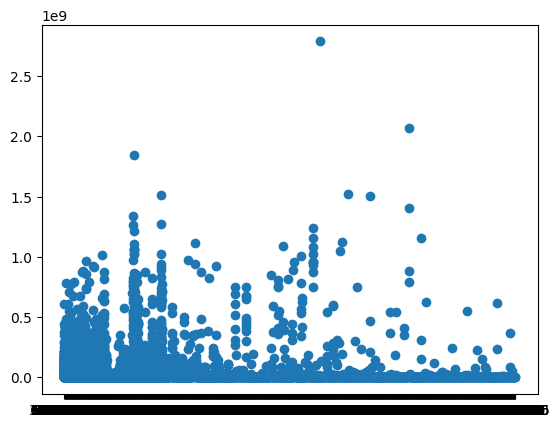

In [8]:
plt.scatter(data['budget'], data['revenue'])
plt.show()

### Mappings

In [6]:
atm_mapping = {
    1: "Normale",
    2: "Pluie légère",
    3: "Pluie forte",
    4: "Neige - Grêle",
    5: "Brouillard - Fumée",
    6: "Vent fort - Tempête",
    7: "Temps éblouissant",
    8: "Temps couvert",
    9: "Autre"
}

lum_mapping = {
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage public non allumé",
    5: "Nuit avec éclairage public allumé"
}

## Analyse

### Distribution des conditions atmosphériques

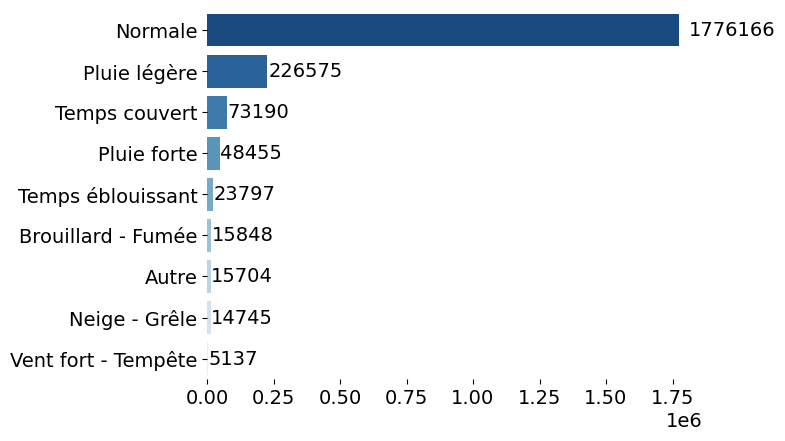

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set larger font sizes using rcParams
plt.rcParams.update({
    'axes.titlesize': 20,  # Title font size
    'axes.labelsize': 16,  # Axis labels font size
    'xtick.labelsize': 14,  # X-axis tick labels font size
    'ytick.labelsize': 14,  # Y-axis tick labels font size
    'legend.fontsize': 14,  # Legend font size (if applicable)
    'font.size': 14  # General font size
})

data['atm_meaning'] = data['atm'].map(atm_mapping)

# Reverse the order of the categories for right-to-left orientation
atm_order = data['atm_meaning'].value_counts(ascending=False).index

# Generate reversed color palette
colors = sns.color_palette("Blues", len(atm_order))[::-1]

# Plot horizontal bar chart
sns.barplot(
    y='atm_meaning', 
    x='atm', 
    data=data.groupby('atm_meaning')['atm'].count().reset_index(),
    order=atm_order,
    palette=colors
)

# Add values at the end of each bar with better positioning
for index, value in enumerate(data['atm_meaning'].value_counts(ascending=False)):
    plt.text(value + (0.02 * value), index, f'{value}', va='center', fontsize=14)

plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.show()

### Relation entre conditions atmosphériques et gravité des accidents

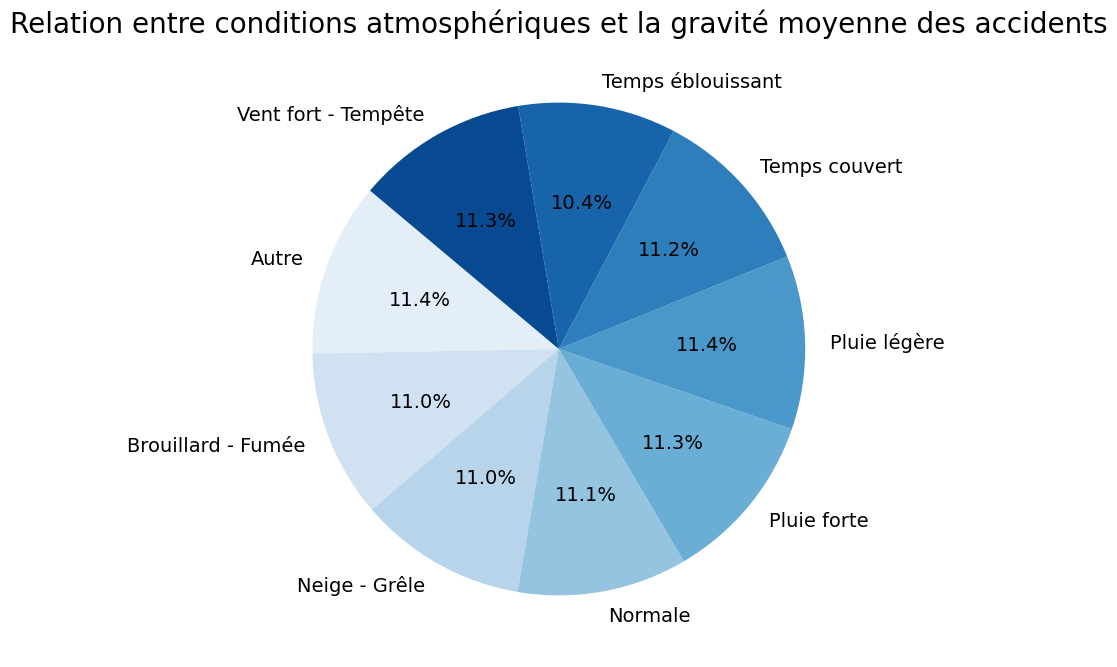

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set larger font sizes using rcParams
plt.rcParams.update({
    'axes.titlesize': 20,  # Title font size
    'axes.labelsize': 16,  # Axis labels font size
    'xtick.labelsize': 14,  # X-axis tick labels font size
    'ytick.labelsize': 14,  # Y-axis tick labels font size
    'legend.fontsize': 14,  # Legend font size (if applicable)
    'font.size': 14  # General font size
})

data['atm_meaning'] = data['atm'].map(atm_mapping)

gravite_moyenne = data.groupby('atm_meaning')['grav'].mean().reset_index()

# Create a pie chart using matplotlib and a Seaborn color palette
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Blues", len(gravite_moyenne['atm_meaning']))

plt.pie(
    gravite_moyenne['grav'],
    labels=gravite_moyenne['atm_meaning'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 14}  # Set font size for pie chart text
)
plt.title("Relation entre conditions atmosphériques et la gravité moyenne des accidents")
plt.show()


### Distribution de la lumiere du jour

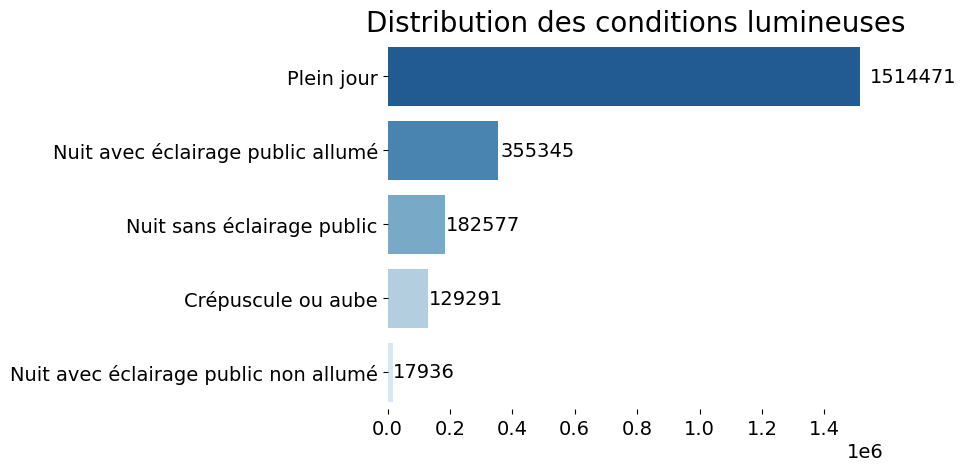

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set larger font sizes using rcParams
plt.rcParams.update({
    'axes.titlesize': 20,  # Title font size
    'axes.labelsize': 16,  # Axis labels font size
    'xtick.labelsize': 14,  # X-axis tick labels font size
    'ytick.labelsize': 14,  # Y-axis tick labels font size
    'legend.fontsize': 14,  # Legend font size (if applicable)
    'font.size': 14  # General font size
})

data['lum_meaning'] = data['lum'].map(lum_mapping)

# Reverse the order of the categories for right-to-left orientation
lum_order = data['lum_meaning'].value_counts(ascending=False).index

# Generate reversed color palette
colors = sns.color_palette("Blues", len(lum_order))[::-1]

# Plot horizontal bar chart
sns.barplot(
    y='lum_meaning', 
    x='lum', 
    data=data.groupby('lum_meaning')['lum'].count().reset_index(),
    order=lum_order,
    palette=colors
)

# Add values at the end of each bar with better positioning
for index, value in enumerate(data['lum_meaning'].value_counts(ascending=False)):
    plt.text(value + (0.02 * value), index, f'{value}', va='center', fontsize=14)

plt.title("Distribution des conditions lumineuses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.xlabel("")
plt.ylabel("")
plt.show()


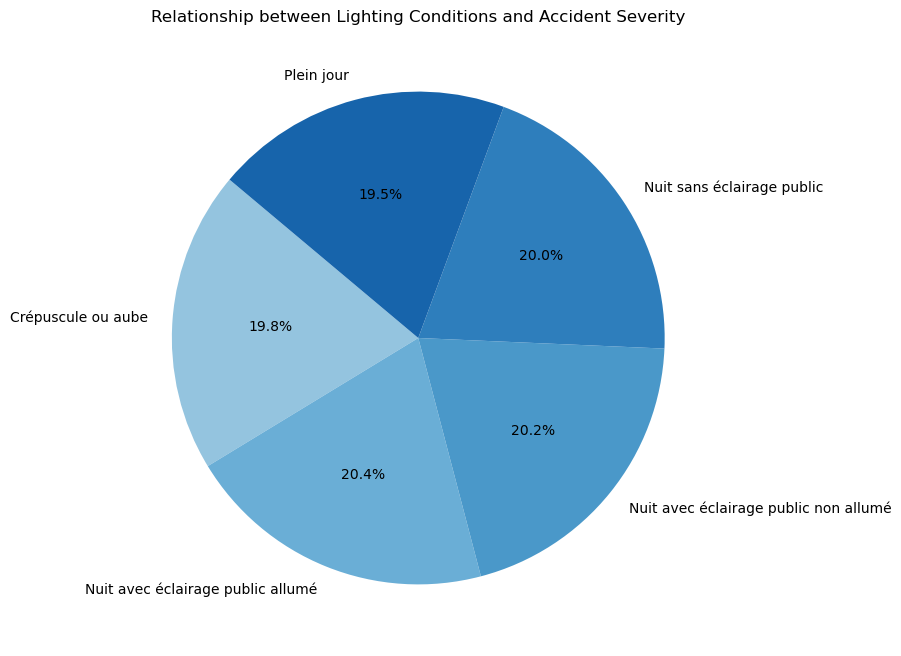

In [12]:
data['lum_meaning'] = data['lum'].map(lum_mapping)

# Calculate the average severity for each lighting condition
lum_moyenne = data.groupby('lum_meaning')['grav'].mean().reset_index()

# Create a pie chart with shades of blue
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(lum_moyenne['lum_meaning'])))
plt.figure(figsize=(8, 8))
plt.pie(lum_moyenne['grav'], labels=lum_moyenne['lum_meaning'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Relationship between Lighting Conditions and Accident Severity")
plt.show()

## Conclusion
L'analyse des données sur les accidents corporels de la circulation montre que ni les conditions atmosphériques ni les conditions d'éclairage n'ont une influence significative sur la gravité des accidents. 

La plupart des accidents surviennent dans des conditions météorologiques normales ou sous un ciel couvert, mais cela reflète principalement leur fréquence élevée dans les situations de circulation quotidienne. De plus, la gravité des accidents reste constante, quelle que soit la météo ou l'éclairage, ce qui pourrait s'expliquer par l'adaptation des conducteurs aux conditions défavorables, l'importance des infrastructures routières, ou encore le rôle prédominant de facteurs comme la vitesse et le comportement des usagers. 